In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve, f1_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# **Exploratory Data Analisis**
---

In [5]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
data_x=pd.DataFrame(breast_cancer_wisconsin_original.data.features)
data_y=pd.DataFrame(breast_cancer_wisconsin_original.data.targets)

**Decripcion de los atributos:**
1. Sample code number:            id number

2. Clump Thickness:               1 - 10

3. Uniformity of Cell Size:       1 - 10

4. Uniformity of Cell Shape:      1 - 10

5. Marginal Adhesion:             1 - 10

6. Single Epithelial Cell Size:   1 - 10

7. Bare Nuclei:                   1 - 10

8. Bland Chromatin:               1 - 10

9. Normal Nucleoli:               1 - 10

10. Mitoses:                       1 - 10

11. Class:                        (2 for benign, 4 for malignant)

Primeros 5 registros del DataFrame: 
 ----------------------------------------


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


Dimensiones del set de datos:  (699, 9)

Tipo de dato de las variables: 
 ----------------------------------------
Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object

Descripcion estadística de las variable: 
 ----------------------------------------


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000



Distribucion de los datos de las diferentes categorias: 
 ----------------------------------------
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
----------------------------------------


1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_of_cell_size, dtype: int64
----------------------------------------


1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_of_cell_shape, dtype: int64
----------------------------------------


1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_adhesion, dtype: int64
----------------------------------------


2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_epithelial_cell_size, dtype: int64
-----------------

Clump_thickness                 7.928395
Uniformity_of_cell_size         9.311403
Uniformity_of_cell_shape        8.832265
Marginal_adhesion               8.153191
Single_epithelial_cell_size     4.903124
Bare_nuclei                    13.277695
Bland_chromatin                 5.945620
Normal_nucleoli                 9.324680
Mitoses                         2.941492
dtype: float64


Porcentaje de nulos: 
 ----------------------------------------


Clump_thickness                0.00000
Uniformity_of_cell_size        0.00000
Uniformity_of_cell_shape       0.00000
Marginal_adhesion              0.00000
Single_epithelial_cell_size    0.00000
Bare_nuclei                    0.02289
Bland_chromatin                0.00000
Normal_nucleoli                0.00000
Mitoses                        0.00000
dtype: float64


Porcentaje de cada clase: 
 ----------------------------------------


Class
2        0.655222
4        0.344778
dtype: float64


Boxplot de las variables numéricas
 ----------------------------------------


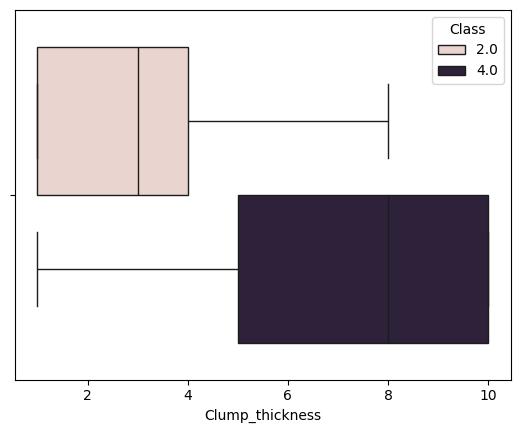

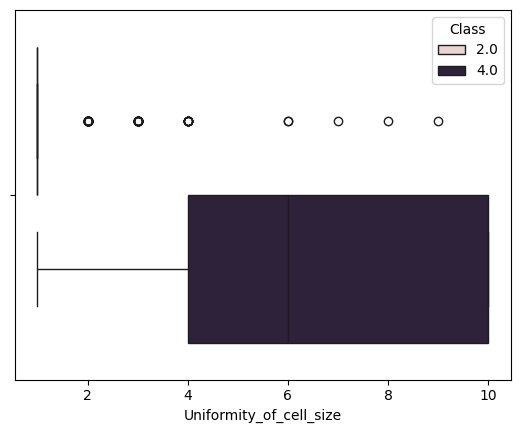

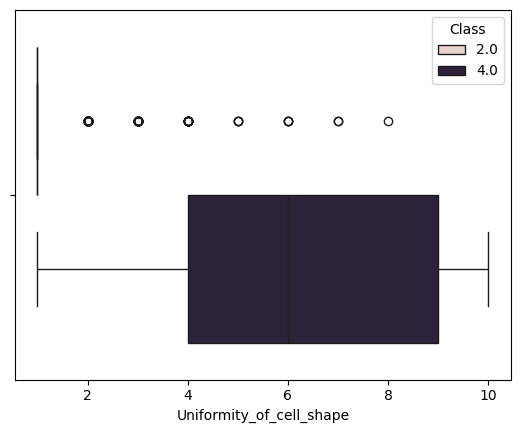

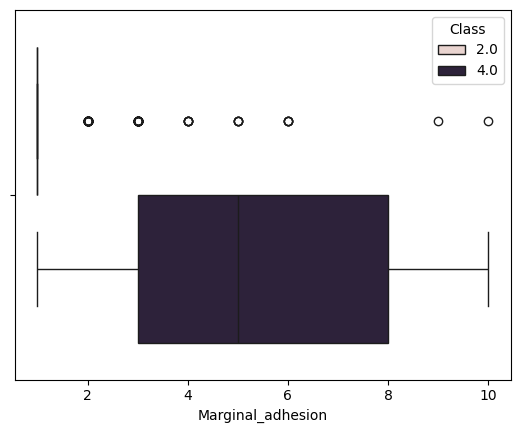

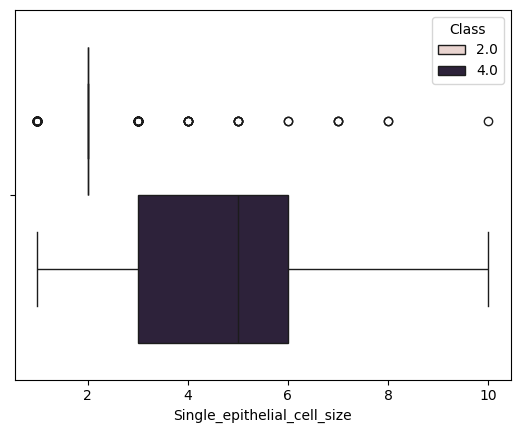

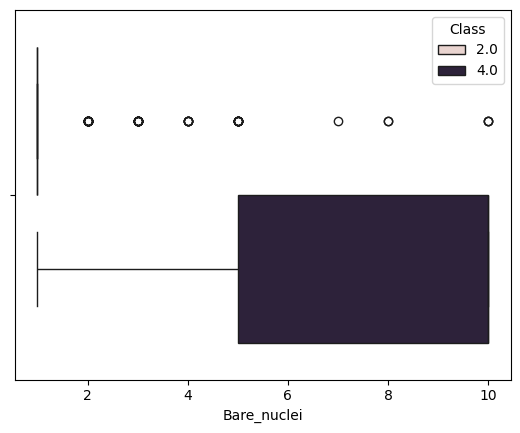

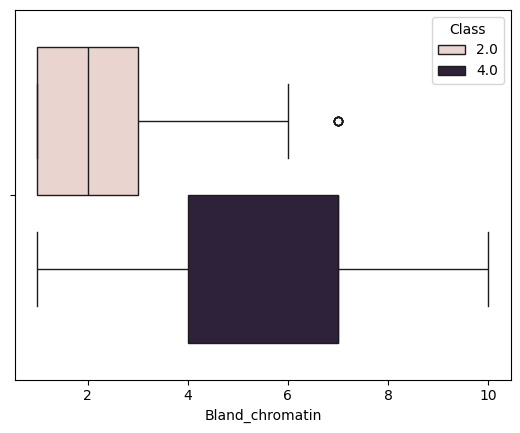

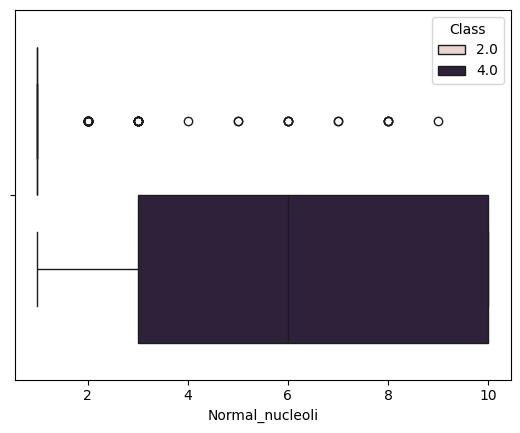

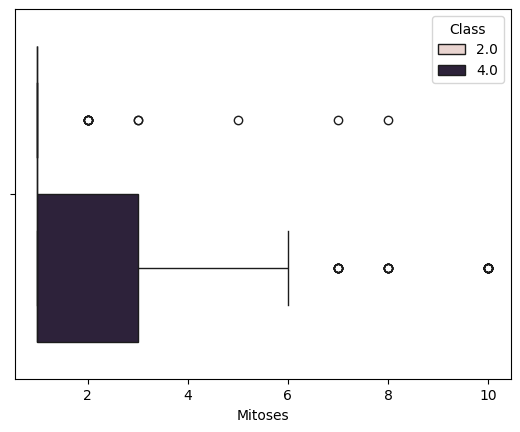


Histograma de las variables numéricas
 ----------------------------------------


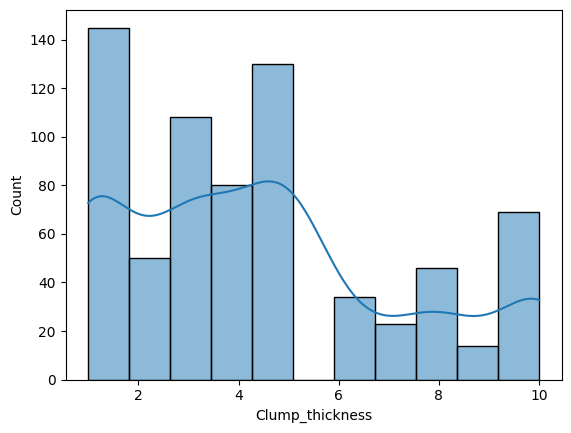

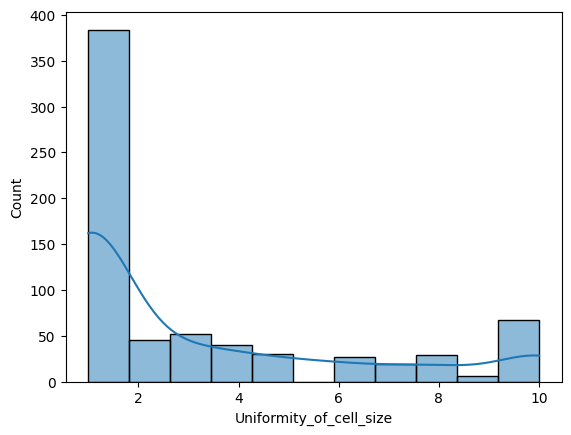

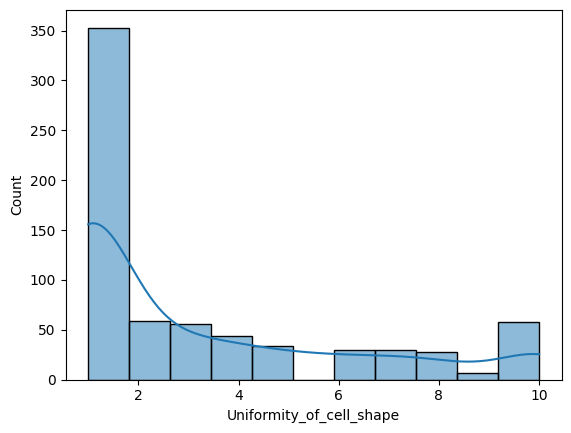

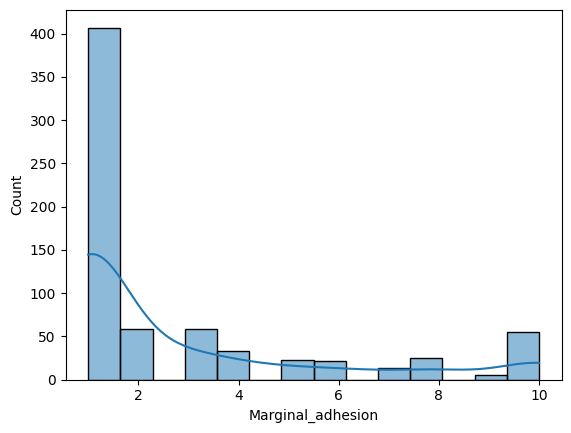

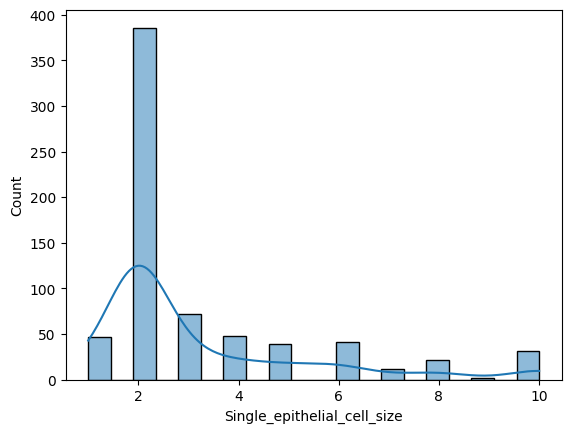

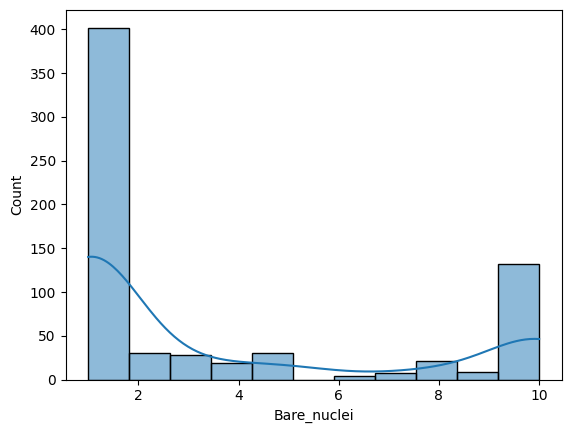

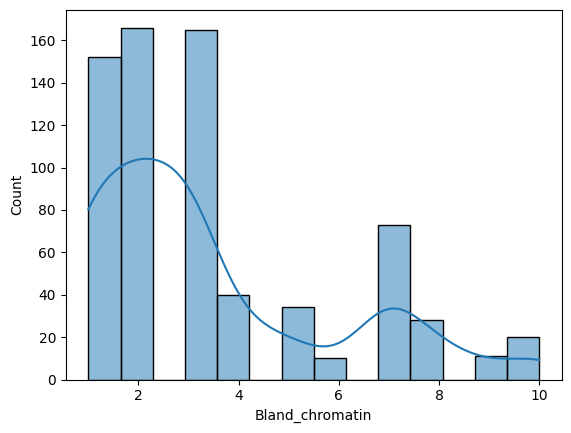

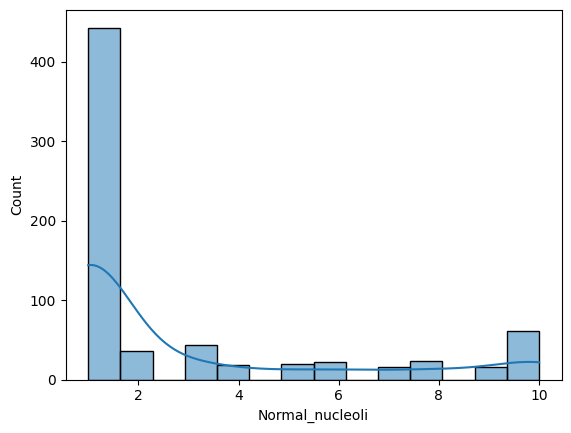

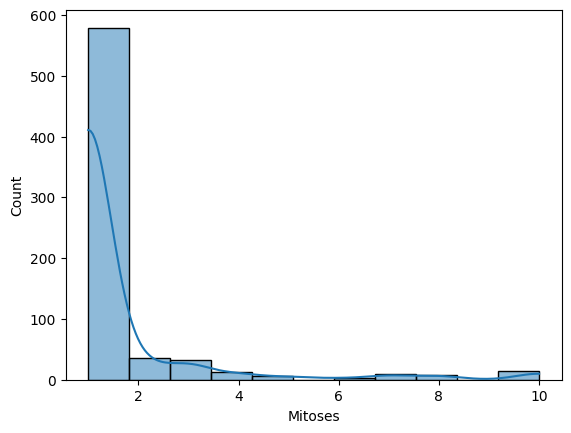



MATRIZ DE CORRELACIÓN ----------------------------------------


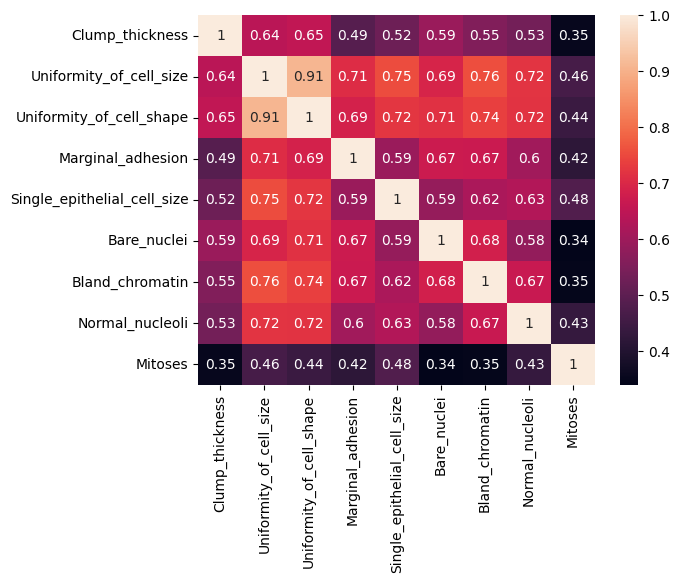

In [6]:
print('Primeros 5 registros del DataFrame: \n','-'*40)
display(data_x.head())

print('Dimensiones del set de datos: ',data_x.shape)

print('\nTipo de dato de las variables: \n','-'*40)
print(data_x.dtypes)

print('\nDescripcion estadística de las variable: \n','-'*40)
display(data_x.describe())

print('\nDistribucion de los datos de las diferentes categorias: \n','-'*40)
for col in data_x.columns:
    print(data_x[col].value_counts())
    print('-'*40)
    print('\n')

print('\nVarianzas de los diferentes atributos: \n','-'*40)
display(data_x.var())


print('\nPorcentaje de nulos: \n','-'*40)
display(data_x.isna().sum() / len(data_x))

print('\nPorcentaje de cada clase: \n','-'*40)
display(data_y.value_counts() / len(data_y))

num_cols=data_x.select_dtypes(include='number').columns
cat_cols=data_x.select_dtypes(include='O')

print('\nBoxplot de las variables numéricas\n','-'*40)
for c in num_cols:
    sns.boxplot(x=c,hue='Class',data=pd.concat([data_x,data_y]))
    plt.show()

print('\nHistograma de las variables numéricas\n','-'*40)
for c in num_cols:
    sns.histplot(data_x[c],kde=True)
    plt.show()

print('\n\nMATRIZ DE CORRELACIÓN','-'*40)
sns.heatmap(data_x[num_cols].dropna().corr(),annot=True)
plt.show()


# **PREPROCESAMIENTO**
---

In [7]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
data=pd.DataFrame(pd.concat([breast_cancer_wisconsin_original.data.ids,breast_cancer_wisconsin_original.data.features,breast_cancer_wisconsin_original.data.targets],axis=1))

### **Tratamiento de los valores NULOS**

In [8]:
data.isna().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
def nul_treatment(data,how='drop'):
    data_nul=data.dropna(how='any')
    if how=='drop':
        return data_nul
    else:
        #Definimos X e y
        X_nul=data_nul.drop(['Bare_nuclei'],axis=1)
        y_nul=data_nul['Bare_nuclei']

        #Dividimos en muestra de entrenamiento y test.
        X_train_nul,X_test_nul,y_train_nul,y_test_nul=train_test_split(X_nul,y_nul,test_size=.25,random_state=40,stratify=y_nul)
        #KNeighborsClassifier
        param_grid = {
            'n_neighbors': [3, 5, 7,9,10,12],   # Número de vecinos a considerar
            'p': [1, 2]  # Parámetro p para la distancia (1 para Manhattan, 2 para Euclidiana)
        }

        # Crea el KNeighborsClassifier
        knn_classifier = KNeighborsClassifier()

        # Crea el objeto GridSearchCV
        grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

        # Entrena el modelo con la búsqueda de hiperparámetros
        grid_search.fit(X_train_nul, y_train_nul)
        best_knn_classifier = grid_search.best_estimator_

        rellenar=data[data['Bare_nuclei'].isnull()]
        preds=best_knn_classifier.predict(rellenar.drop('Bare_nuclei',axis=1))
        data.loc[data['Bare_nuclei'].isnull(), 'Bare_nuclei'] = preds
        return data
        
data=nul_treatment(data,how='model')

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## **Varianza en las variables**

In [10]:
data.var()

Sample_code_number             3.808071e+11
Clump_thickness                7.928395e+00
Uniformity_of_cell_size        9.311403e+00
Uniformity_of_cell_shape       8.832265e+00
Marginal_adhesion              8.153191e+00
Single_epithelial_cell_size    4.903124e+00
Bare_nuclei                    1.322156e+01
Bland_chromatin                5.945620e+00
Normal_nucleoli                9.324680e+00
Mitoses                        2.941492e+00
Class                          9.049194e-01
dtype: float64

Eliminamos Mitoses ya que tiene una varianza muy reducida en comparación con el resto de atributos.

In [11]:
data.drop('Mitoses',axis=1,inplace=True)

## **Observaciones duplicadas**

In [12]:
dups=data[data.duplicated(subset='Sample_code_number')]
print('Cantidad de duplicados por ID: ',len(dups))
dups

Cantidad de duplicados por ID:  54


,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Class
9,1033078,4,2,1,1,2,1.0,2,1,2
30,1070935,3,1,1,1,1,1.0,2,1,2
82,1143978,5,2,1,1,2,1.0,3,1,2
109,1171710,6,5,4,4,3,9.0,7,8,4
116,1173347,8,3,3,1,2,2.0,3,2,2
121,1174057,4,2,1,1,2,2.0,3,1,2
195,1212422,4,1,1,1,2,1.0,3,1,2
208,1218860,1,1,1,1,1,1.0,3,1,2
252,1017023,6,3,3,5,3,10.0,3,5,2
253,1100524,6,10,10,2,8,10.0,7,3,4


Eliminamos los duplicados

In [13]:
data.drop_duplicates(subset='Sample_code_number',inplace=True)
data.drop(['Sample_code_number'],axis=1,inplace=True) #Eliminamos el ID

### **FEATURE ENGINEERING**

In [14]:
#Calculamos la uniformidad volumetrica a partir de la uniformidad en forma y tamaño
data['un_vol']=data['Uniformity_of_cell_shape'] * data['Uniformity_of_cell_size']

### **Extraemos la variable objetivo (Class)**

In [15]:
X=data.drop('Class',axis=1)
y=data['Class'].apply(lambda x: 0 if x==2 else 1)

# **Corrección del desbalanceo de clases**
---

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

### **Separamos en muestra de entrenamiento y test.**

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=.3,random_state=70,stratify=y_ros)

## **Normalización de los datos**

Aplicamos un escalado a los datos de tipo min max ya que todos los atributos tienen limitados sus valores entre 1-10.

In [18]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Prueba con LogisticRegression**
---

In [19]:
clf = LogisticRegression(penalty=None, solver= 'newton-cg') #'newton-cholesky'
clf.fit(X_train,y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [20]:
pred=clf.predict(X_test)
print(accuracy_score(y_train,clf.predict(X_train)))
print(accuracy_score(y_test,pred))
print(recall_score(y_test,pred))

0.9740484429065744
0.9798387096774194
0.9838709677419355


In [21]:
print(confusion_matrix(y_test,pred))

[[121   3]
 [  2 122]]


Vemos que los resultados son muy positivos, para mejorar el modelo y reducir el overfitting, hacemos Hyperparameter Tunning empleando GridSearchCV

# **LogisticRegression con Hyperparameter Tunning**
---

In [27]:
clf=LogisticRegression( solver= 'newton-cg') #'newton-cholesky'
params={
    'penalty':[None,'l2','l1','elasticnet'],
    'C':[0,0.1,1]
}
grid=GridSearchCV(estimator=clf,param_grid=params,cv=5,scoring='recall')
grid.fit(X_train,y_train)
grid.best_score_

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will igno

0.9689050211736238

In [28]:
mod=grid.best_estimator_

Mejores parámetros del modelo.

In [29]:
mod.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
print(accuracy_score(y_train,mod.predict(X_train)))
pred=mod.predict(X_test)
print(accuracy_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))
y_probs = mod.predict_proba(X_test) #Predict class probabilities for X.The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest
y_probs = y_probs[:, 1]
roc_auc_score(y_test, y_probs)

0.9740484429065744
0.9798387096774194
0.9838709677419355
0.9799196787148594


0.9967481789802289

Vemos que hemos conseguido reducir el overfitting, manteniendo un 99,9% de Recall que es nuestra métrica objetivo a maximizar.

# **Importancia de las Variables**
---

In [34]:
import numpy as np
pd.DataFrame(zip(np.abs(mod.coef_[0]),X.columns),columns=['impo','var']).sort_values('impo',ascending=False)

,impo,var
8,6.788241,un_vol
1,6.594949,Uniformity_of_cell_size
0,5.712240,Clump_thickness
5,4.809469,Bare_nuclei
2,4.597507,Uniformity_of_cell_shape
3,1.980044,Marginal_adhesion
7,1.679928,Normal_nucleoli
4,1.461481,Single_epithelial_cell_size
6,1.000615,Bland_chromatin


Observamos que la variable creada en la fase de Feature Engineering ha tenido un gran impacto en la performance del modelo.